In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
# modules
from Ops.spectral_normalization import SpectralConv2D, SpectralDense
from Ops.ops import ResnetBlock, ResnetBlockUp, ResnetBlockDown
from Ops.attention import Attention
from Ops.global_sum_pooling import GlobalSumPooling2D
from Ops.conditional_batch_normalization import ConditionalBatchNormalization

In [2]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
test_x = test_x.astype('float32')
test_x = (test_x - 127.5) / 127.5
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# BigGAN

## S1

In [3]:
custom_objects={'SpectralConv2D': SpectralConv2D, 'SpectralDense':SpectralDense}
discriminator = load_model('./BigGANClf.h5', custom_objects=custom_objects)
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 2s 7ms/step - loss: 0.9139 - sparse_categorical_accuracy: 0.7963


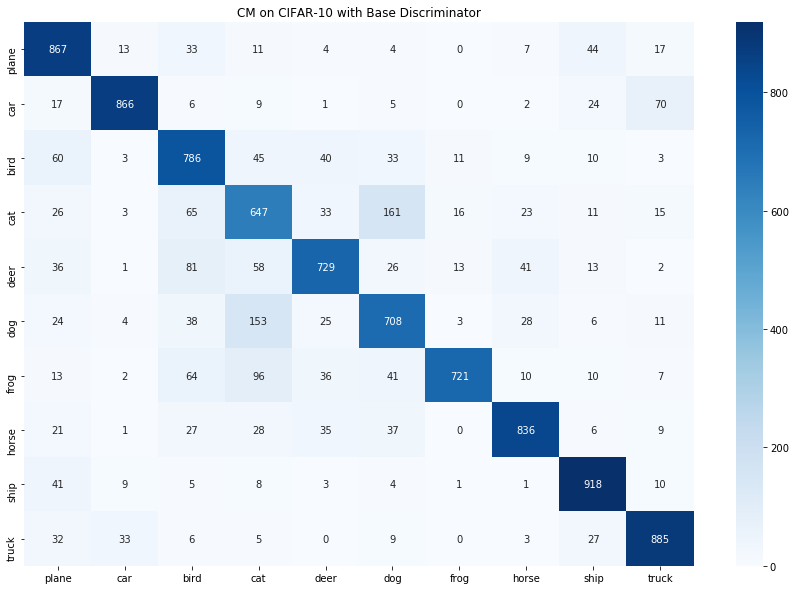

In [5]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Base Discriminator')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S2

In [6]:
custom_objects={'SpectralConv2D': SpectralConv2D, 'SpectralDense':SpectralDense}
discriminator = load_model('./BigGANClf_GAN.h5', custom_objects=custom_objects)
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 2s 7ms/step - loss: 1.3517 - sparse_categorical_accuracy: 0.7274


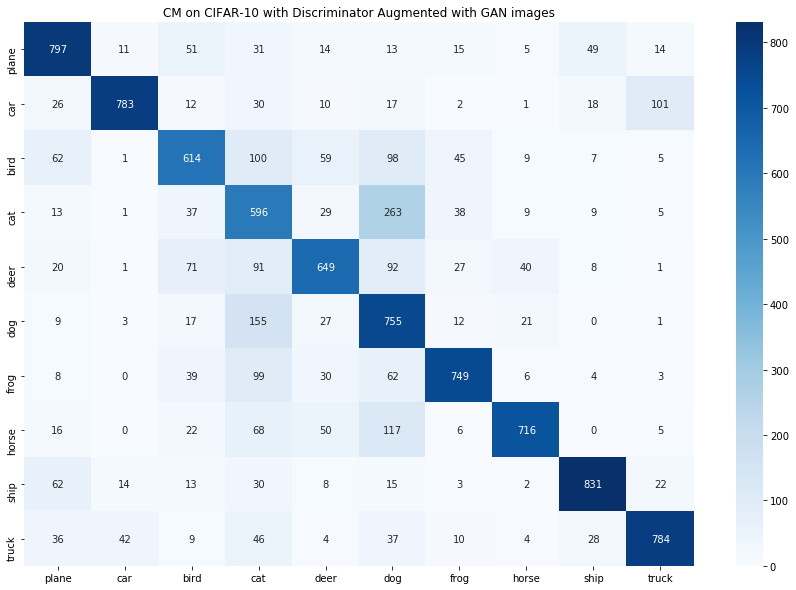

In [7]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Discriminator Augmented with GAN images')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S3

In [ ]:
#measure accuracy on CIFAR10 test data
discriminator = '../../ACGAN/history/bigacgan-cifar10-11/training_checkpoints/discriminator-e100.h5'
discriminator = load_model(discriminator)
_eval = discriminator.evaluate(test_x, test_y)
_, predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

In [ ]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Discriminator from BigGAN')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)